# 🚀 Transformaciones para Feature Engineering

## 📚 ¡Preparando las Herramientas Mágicas! (Importar Librerías)

Antes de empezar cualquier aventura con datos, un científico de datos necesita sus herramientas especiales. ¡Es como un mago preparando sus pociones! 🧪


In [2]:
# Transformaciones para Feature Engineering
#Importar libreras
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

Aquí, el código está llamando a sus ayudantes:
* `numpy` (a menudo llamado `np`): Es como una calculadora súper poderosa 💪 para trabajar con números y listas de números de forma eficiente.
* `pandas` (conocido como `pd`): Imagina que es un archivador mágico 🗄️ que organiza los datos en tablas (llamadas DataFrames) para que sea fácil mirarlos, cambiarlos y jugar con ellos.
* `seaborn` (llamado `sns`) y `matplotlib.pyplot` (llamado `plt`): Son como los crayones y pinceles 🖍️🎨 del científico de datos. Ayudan a dibujar gráficos bonitos para entender mejor los datos.


## 🌳 Transformaciones Logarítmicas: Achicando Gigantes 🐜

A veces, los números en los datos pueden ser muuuuy grandes, como gigantes, y otros muy pequeños, como hormigas. Esto hace difícil ver qué está pasando. ¡Las transformaciones logarítmicas ayudan a que todos tengan un tamaño más parecido!

Primero, carga unos datos sobre precios de Airbnb. ¡Imagina que son los precios de muchas casitas de vacaciones! 🏡


In [3]:
#Cargar datos de precios de airbnb
df = pd.read_csv("Dia4_Airbnb_Open_Data.csv")
df["price"].head(5)


0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

El código anterior lee un archivo llamado "Dia4\_Airbnb\_Open\_Data.csv" y lo guarda en una tabla `df`. Luego, muestra los primeros 5 precios para ver cómo son.

> Se usa el logaritmo para reducir los datos, pero cuanto tenemos valores muy grandes y poder visualizarlos mejor, tambien reduce los outliers, ademas de pareceriara verse como una distribución.

🎯 Usar logaritmos es como usar una lupa especial que hace que los números gigantes se vean más pequeños y los pequeños un poquito más grandes. Esto ayuda a:
* 🔍 **Visualizar mejor**: Si hay precios de \$10 y otros de \$10,000, en un gráfico normal, el de \$10 casi no se vería. Con logaritmos, ambos son más fáciles de comparar.
* 🤏 **Reducir outliers**: Esos precios súper altos (outliers o valores atípicos) no se alejarán tanto del resto después de aplicar el logaritmo.
* 🔔 **Acercarse a una campana**: A veces, los datos transformados se parecen más a una "distribución normal" (la forma de una campana), lo cual es bueno para algunos modelos de predicción.

Ahora, ¡a aplicar la magia de los logaritmos! ✨

c:\Users\JUNIORAOA\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\JUNIORAOA\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\JUNIORAOA\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='price', ylabel='Count'>

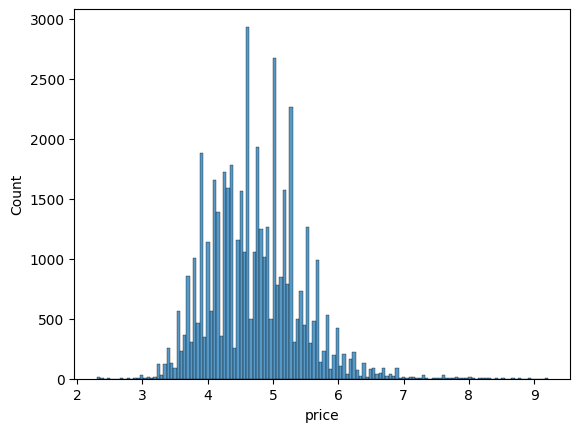

In [4]:
log_natural = np.log(df.price)
log_10 = np.log10(df.price)
log_2 = np.log2(df.price)

Aquí se calculan tres tipos de logaritmos para la columna `price`:
* `np.log()`: Logaritmo natural (base $e$).
* `np.log10()`: Logaritmo base 10.
* `np.log2()`: Logaritmo base 2.

Y ahora, ¡a dibujar para ver cómo quedaron! 📊

<Axes: xlabel='price', ylabel='Count'>

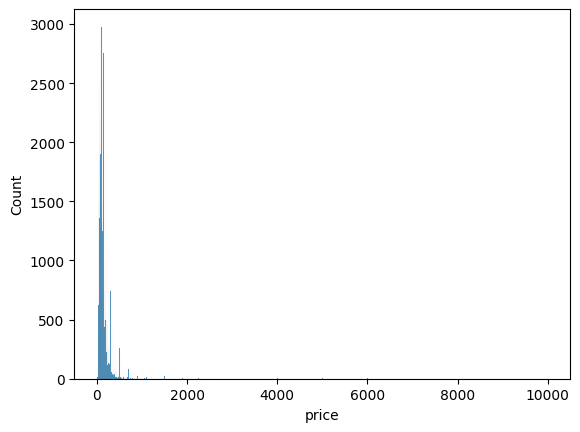

In [5]:
sns.histplot(log_natural)

<Axes: xlabel='price', ylabel='Count'>

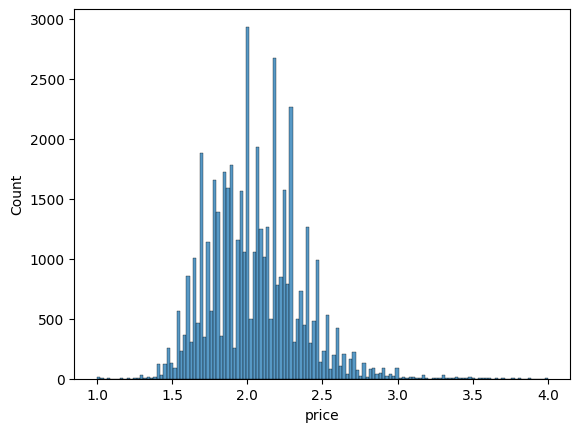

In [6]:
sns.histplot(df.price)

<Axes: xlabel='price', ylabel='Count'>

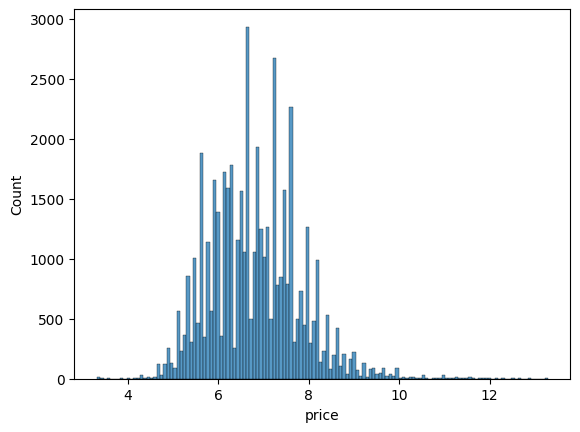

In [7]:
sns.histplot(log_10)

In [ ]:
sns.histplot(log_2)

Estos comandos dibujan histogramas (gráficos de barras que muestran cuántas veces aparece cada valor). Se puede ver el histograma de los precios originales y luego los histogramas de los precios transformados con los diferentes logaritmos. ¡Seguro se ven menos "estirados" y más "centrados"!

> Sirve para modelos de regresión para mejorar los ajustes.

👍 En modelos de regresión (cuando intentamos predecir un número, como el precio de una casa), si la variable que queremos predecir o las variables que usamos para predecir están muy "sesgadas" (no tienen forma de campana), transformarlas con logaritmos puede hacer que el modelo aprenda mejor y haga predicciones más acertadas.


## 🌱 Transformaciones Raíz Cuadrada: Suavizando con Cariño 🧸

La transformación de raíz cuadrada es otra forma de "calmar" a los números grandes, pero es un poco más suave que el logaritmo.

### 🎯 ¿Para qué sirve?

1. **Reducir la asimetría** (cuando los datos están sesgados a la derecha).
2. **Suavizar outliers**, pero no tanto como con logaritmos.
3. **Estabilizar la varianza**, útil en estadísticas y modelos.

### 🧠 ¿Cuándo usarla?

| Si tienes datos...                           | Entonces...                                    |
| -------------------------------------------- | ---------------------------------------------- |
| Con valores grandes pero **no tan extremos** | ✅ Usa raíz cuadrada                            |
| Que incluyen ceros                           | ✅ Sí puedes usar raíz cuadrada (porque √0 = 0) |
| Con valores negativos                        | ❌ No se puede usar √ de negativos directamente |


Es como darle un masajito a los datos para que no estén tan tensos. 💆‍♀️
* Si los números son grandes pero no *exageradamente* grandes, la raíz cuadrada es una buena opción.
* ¡Funciona con el cero! ($ \sqrt{0} = 0 $), lo cual es útil porque los logaritmos no se llevan bien con el cero.
* Pero, ¡cuidado! 🚫 No se puede sacar la raíz cuadrada de números negativos directamente si queremos resultados reales.

Veamos cómo se aplica:

<Axes: xlabel='price', ylabel='Count'>

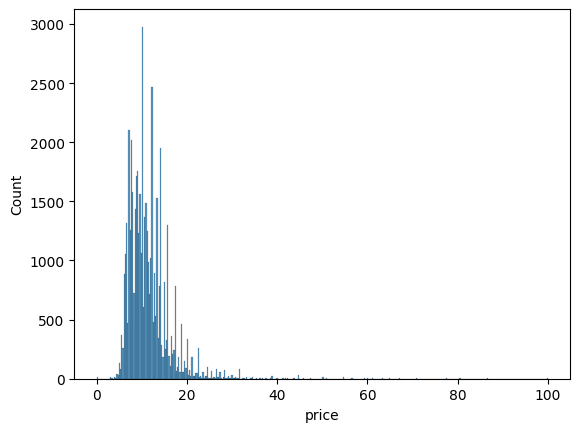

In [8]:
#Aplicar raiz cuadrada 
raiz  = np.sqrt(df.price)
sns.histplot(raiz)

El código toma la columna `price` y le aplica `np.sqrt()` (que significa *square root* o raíz cuadrada). Luego, dibuja un histograma para ver cómo se ven los datos ahora. Probablemente estarán menos sesgados (menos amontonados a un lado). Esta técnica también ayuda a que los modelos de machine learning funcionen mejor, especialmente si los datos tienen esa "cola larga" a la derecha.


## ✨ Transformaciones Box-Cox: Buscando la Perfección de la Campana 🔔

La transformación de Box-Cox es como un sastre experto 🕴️ que intenta ajustar los datos para que se parezcan lo más posible a una "distribución normal" (la famosa forma de campana). ¡Esto es súper útil para muchos modelos estadísticos y de machine learning que esperan que los datos se porten bien y sigan esta distribución!

Primero, se necesitan nuevas herramientas y nuevos datos. Esta vez, son datos sobre retrasos de aerolíneas. ✈️⏰


In [9]:
import plotly.express as px
from scipy.stats import boxcox

df = pd.read_csv("Dia5_Airline_daley.csv") 
df.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0


Se importa `plotly.express` (otro amigo para hacer gráficos interactivos) y `boxcox` de `scipy.stats` (el mago de las estadísticas). Luego, se cargan los datos de retrasos de aerolíneas y se echa un vistazo a las primeras filas.

A continuación, se define una función llamada `plotting`. ¡Es como crear una receta para hacer gráficos! 📜 Esta función ayudará a dibujar líneas de tiempo de forma rápida y bonita.


In [10]:
def plotting(title, data, x, y,x_label,y_label, text= False, lam = None):
    fig = px.line(data, x=data[x], y=data[y], labels={ x:x_label, y: y_label})
    fig.update_layout(template="simple_white", font = dict(size=18),
                      title_text=title, width=650, title_x=0.5, height=400)
    
    if text:
        fig.add_annotation(x='1952-12-20', y=10, text = f'Lambda = {lam:.3f}',
                           align='left', yanchor = 'bottom', showarrow=False,
                           font=dict(size=20, color="black", family="Courier New, monospace"),
                           bordercolor = 'black', borderwidth = 2, bgcolor = "white")
    
    fig.show()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,fecha
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0,2020-12-01
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0,2020-12-01
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0,2020-12-01
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0,2020-12-01
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0,2020-12-01


Esta función `plotting` tomará los datos y los nombres de las columnas para `x` e `y`, y dibujará un gráfico de líneas. Incluso puede añadir un texto especial si se le pide, como el valor de "lambda" que veremos en Box-Cox.

Ahora, un poco de preparación de datos. Se crea una columna `fecha` juntando el año y el mes, ¡así es más fácil trabajar con el tiempo! 🗓️


In [11]:
df['fecha'] = pd.to_datetime(df['year'].astype(str)+'-'+df['month'].astype(str)+'-'+'01')
df.head(5)

year                            int64
month                           int64
carrier                        object
carrier_name                   object
airport                        object
airport_name                   object
arr_flights                   float64
arr_del15                     float64
carrier_ct                    float64
weather_ct                    float64
nas_ct                        float64
security_ct                   float64
late_aircraft_ct              float64
arr_cancelled                 float64
arr_diverted                  float64
arr_delay                     float64
carrier_delay                 float64
weather_delay                 float64
nas_delay                     float64
security_delay                float64
late_aircraft_delay           float64
fecha                  datetime64[ns]
dtype: object

In [ ]:
df.dtypes

Se revisan los tipos de datos para asegurarse de que la nueva columna `fecha` sea reconocida como una fecha.

Luego, se agrupan los datos por año para sumar el total de retrasos (`arr_del15`) de cada año. 🧐


In [12]:
df_agrupado =df.groupby(df['year'], as_index=False)['arr_del15'].sum()
df_agrupado

,year,arr_del15
0,2019,126945.0
1,2020,43532.0


Y se grafica cómo han cambiado los retrasos a lo largo de los años usando la función `plotting`.


In [13]:
plotting(title="Airline delay", data = df_agrupado, x = 'year',y='arr_del15',x_label='year',y_label='arr_del15')

¡Llegó el momento de Box-Cox! 🚀 Esta transformación encontrará el mejor "lambda" (un parámetro mágico ✨) para hacer que los datos de `arr_del15` se parezcan más a una distribución normal.

In [14]:
#Aplicar Box-cox
df_agrupado['box-cox'], lam = boxcox(df_agrupado['arr_del15'])


La función `boxcox` devuelve dos cosas: los datos transformados (que se guardan en una nueva columna `box-cox`) y el valor de `lam` (lambda) que se usó.

Finalmente, se grafica de nuevo, pero esta vez usando los datos transformados (aunque el gráfico sigue mostrando `arr_del15` en el eje y, la idea es comparar la forma de la serie temporal, y se añade el valor de lambda).


In [ ]:
plotting(title = "Aiplane-delay_box-cox", data= df_agrupado, x = 'year', y = 'box-cox', 
         x_label = 'year', y_label='arr_del15', text = True, lam=lam)

## 📏 Normalización/Estandarización de Variables: ¡Todos a la Misma Escala! ⚖️

Imagina que tienes manzanas 🍎 y sandías 🍉. Si las pesas, las sandías siempre parecerán mucho más "importantes" solo por ser más grandes. En machine learning, si una variable tiene números muy grandes (como los ingresos) y otra números pequeños (como el tiempo en redes sociales), el modelo podría pensar que la de números grandes es más importante, ¡aunque no sea cierto!

La **normalización** y la **estandarización** son técnicas para poner todas las variables en una escala similar, como si convirtiéramos todas las frutas a un tamaño estándar para compararlas justamente.

Se cargan nuevos datos: tiempo en redes sociales e ingresos. 🧑‍💻💰


In [15]:
df= pd.read_csv("Dia5_Time_social_media.csv")
df.head(5)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


Primero, se echa un vistazo a los datos originales graficándolos juntos y por separado.

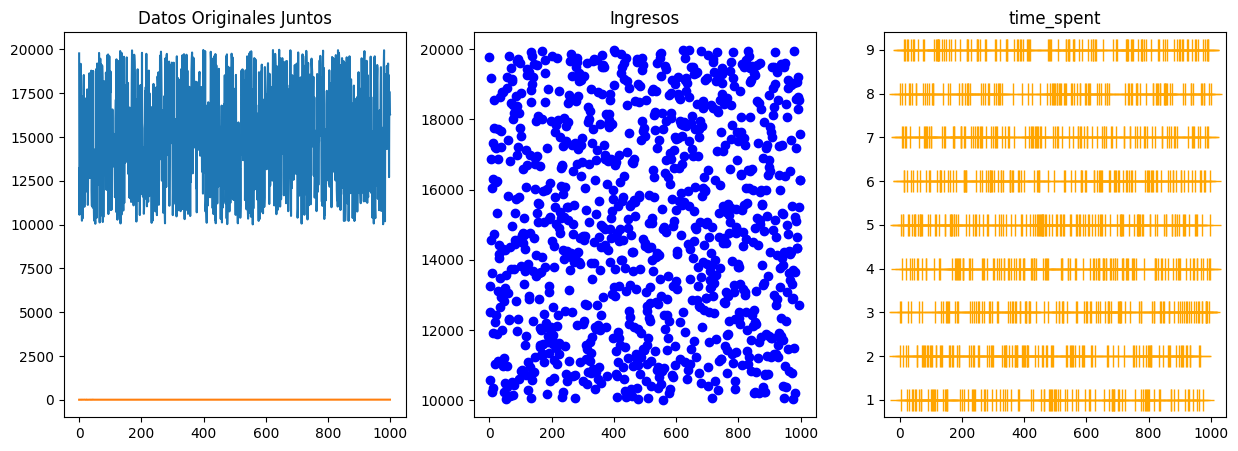

In [16]:
#Graficar datos
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_title("Datos Originales Juntos")
ax1.plot(df[["income","time_spent"]])
ax2.set_title("Ingresos")
ax2.plot(df["income"], linewidth=0, marker = "o", color="blue", markersize=6)
ax3.set_title("time_spent")
ax3.plot(df["time_spent"], linewidth=0, marker="+",color="orange", markersize=16)
plt.show()

Se puede ver que "income" (ingresos) probablemente tendrá valores mucho más grandes que "time\_spent" (tiempo gastado).

Luego, se observa la distribución de cada variable con más detalle, usando gráficos de puntos e histogramas.

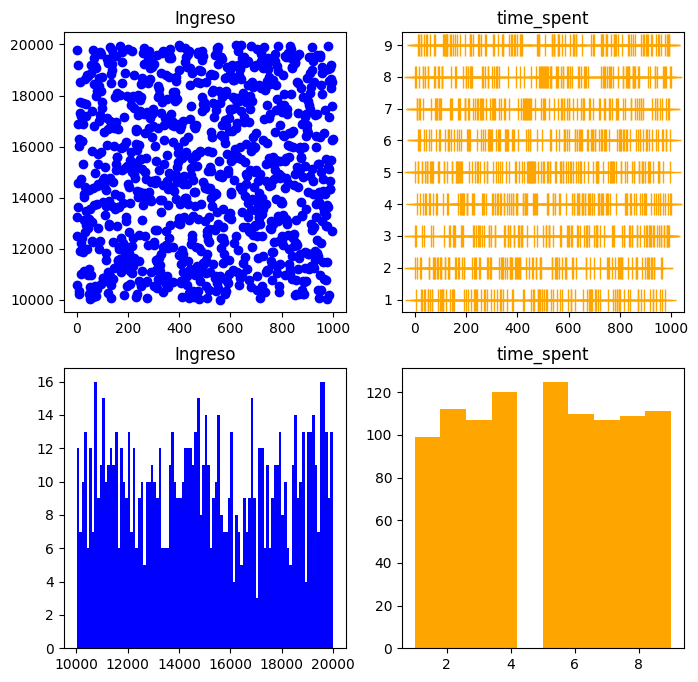

In [17]:
## Distribución de los datos originales

#Graficar datos
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.set_title("Ingreso")
ax1.plot(df["income"], linewidth=0, marker = "o", color="blue", markersize=6)

ax2.set_title("time_spent")
ax2.plot(df["time_spent"], linewidth=0, marker="+",color="orange", markersize=16)

ax3.set_title("Ingreso")
ax3.hist(df["income"], bins=100, color='blue')

ax4.set_title("time_spent")
ax4.hist(df["time_spent"], color='orange')

plt.show()

### 🤏 Escalado en función del mínimo y máximo (Min-Max Scaler)

Esta técnica toma cada columna, encuentra el valor más pequeño (mínimo) y el más grande (máximo). Luego, transforma todos los valores para que queden entre 0 y 1. ¡Es como estirar o encoger una goma elástica para que quepa en una caja!
* El valor mínimo se convierte en 0.
* El valor máximo se convierte en 1.
* Todos los demás quedan en algún punto intermedio.

> Recibe los datos y los convierte a arreglas de numpy, toma el minimo y maximo de cada columna



In [18]:
from sklearn import preprocessing

min_scaled = preprocessing.MinMaxScaler().fit_transform(df[["income","time_spent"]]) 
min_scaled 

array([[0.97933387, 0.25      ],
       [0.05537721, 0.125     ],
       [0.32564205, 0.875     ],
       ...,
       [0.76073435, 0.5       ],
       [0.62810995, 0.375     ],
       [0.62921348, 0.875     ]])

###  벡터 Normalización en función de la Norma de Valor (Normalizer)

Esta es un poco diferente. En lugar de escalar cada columna por separado, ¡escala cada *fila* (cada persona o ejemplo en los datos)! 😮 Para cada fila, calcula una "longitud" o "magnitud" (como la hipotenusa de un triángulo si tuviéramos dos características) y luego divide cada valor de la fila por esa magnitud. El resultado es que cada fila tendrá una "longitud" de 1.

> Implica utilizar la norma del vector, vector es números, buscando que este entre 0 y 1 se agarra la magnitud del vector.
> `normaliza = X / raiz_cuadrada(X1^2+X2^2...)`


In [19]:
normaliza = preprocessing.Normalizer().transform(df[["income","time_spent"]].T)
normaliza = normaliza.T
normaliza

array([[0.04086116, 0.01684304],
       [0.02182954, 0.01122869],
       [0.02739644, 0.04491477],
       ...,
       [0.03635846, 0.02807173],
       [0.03362666, 0.02245738],
       [0.03364939, 0.04491477]])

Aquí, se aplica `Normalizer`. La transposición (`.T`) se usa porque `Normalizer` por defecto trabaja sobre las filas. Si se quiere normalizar cada *característica* (columna) para que sus valores tengan una cierta relación de norma entre ellos (lo cual es menos común para este tipo de normalización general), se podría aplicar diferente, pero la forma usual es por filas (muestras). El código actual lo aplica a las columnas transpuestas y luego lo transpone de nuevo, lo que significa que cada *columna original* (income, time\_spent) es tratada como un vector y normalizada.


### 🎯 Estandarización de los datos (StandardScaler)

Esta es una de las más populares. 🌟 Para cada columna, hace dos cosas:
1.  Resta la media (el promedio) de la columna a cada valor. Esto hace que la nueva media sea 0 (¡los datos se centran!).
2.  Divide el resultado por la desviación estándar de la columna. Esto hace que la nueva desviación estándar sea 1 (¡los datos tienen una "dispersión" estándar!).

El resultado son datos con media 0 y desviación estándar 1. Muchos algoritmos de machine learning, como las Redes Neuronales y las Máquinas de Soporte Vectorial (SVM), funcionan mucho mejor con datos estandarizados.

> EL aprendizaje de maquina trabaja, bajo el supuesto que los datos se distribuyen normalmente
> `estandarizado = (X-media)/std`

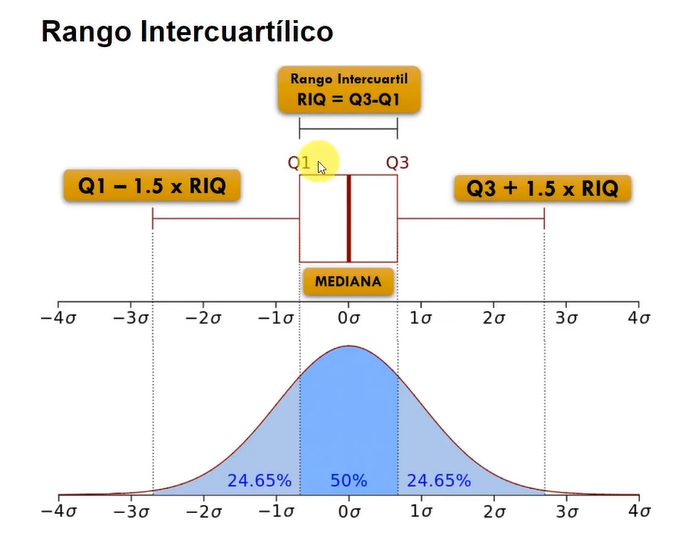

In [20]:
df_standar = preprocessing.StandardScaler().fit_transform(df[["income","time_spent"]])

(array([[ 1.60938044, -0.79990084],
        [-1.50510634, -1.19413487],
        [-0.59409359,  1.17126929],
        ...,
        [ 0.87252195, -0.01143279],
        [ 0.42546967, -0.40566681],
        [ 0.42918947,  1.17126929]]),
 array([[ 0.92365326, -0.5       ],
        [-0.82331184, -0.75      ],
        [-0.31231032,  0.75      ],
        ...,
        [ 0.51033763,  0.        ],
        [ 0.25957891, -0.25      ],
        [ 0.2616654 ,  0.75      ]]))

### 💪 Escalado Robusto a Outliers (RobustScaler)

¿Recuerdas los outliers, esos valores traviesos que son muy diferentes al resto? 🤔 El `MinMaxScaler` y el `StandardScaler` pueden ser afectados por ellos. Si hay un valor súper gigante, puede aplastar al resto de los datos cuando se escalan.

El `RobustScaler` es más... ¡robusto! 💪 En lugar de usar la media y la desviación estándar (que son sensibles a outliers), usa la **mediana** y el **rango intercuartílico** (la diferencia entre el percentil 75 y el percentil 25). Estos son como medidas más "democráticas" que no se dejan influenciar tanto por unos pocos valores extremos.

> `estandarizado = (X - rango_intercuartil) / std` (En realidad, es `(X - mediana) / RangoIntercuartil`)


In [ ]:
datos_robus = preprocessing.RobustScaler().fit_transform(df[["income","time_spent"]])

In [ ]:
df_standar, datos_robus

El código muestra los resultados de la estandarización y el escalado robusto.

### 🧐 Columna 'income': ¡Comparando los Métodos!

Ahora, el código crea DataFrames (tablitas) con los resultados de cada método de escalado para la columna 'income' y los grafica para ver las diferencias. ¡Es como probarse diferentes trajes para ver cuál queda mejor! 👔👗


In [21]:
df_min = pd.DataFrame(min_scaled, columns=["income","time_spent"]) # Usando min_scaled
df_nor= pd.DataFrame(normaliza, columns=["income","time_spent"])
df_standar_scaler = pd.DataFrame(df_standar, columns=["income","time_spent"])
df_robus = pd.DataFrame(datos_robus, columns=["income","time_spent"])

#Crear figura con 5 subfiguras
fig = plt.figure(figsize=(15,3))
ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

#Crear y personaliza series datos
ax1.set_title("income")
ax1.plot(df['income'], linewidth = 0, marker = "*", color = "red", markersize=4)

ax2.set_title("MIn Max")
ax2.plot(df_min['income'], linewidth = 0, marker = "*", color = "red", markersize=4)

ax3.set_title("Normalizer")
ax3.plot(df_nor["income"], linewidth = 0, marker = "*", color = "red", markersize=4)

ax4.set_title("Standar_Scaler")
ax4.plot(df_standar_scaler["income"], linewidth = 0, marker = "*", color = "red", markersize=4)

ax5.set_title("Robust Scaler")
ax5.plot(df_robus["income"], linewidth = 0, marker = "*", color = "red", markersize=4)

plt.show()

Y también se hacen histogramas para ver cómo cambia la forma de la distribución.

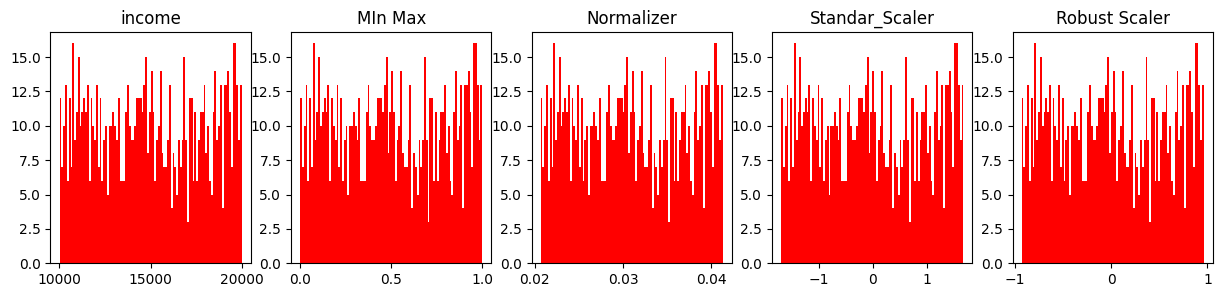

In [28]:
#Crear y personalizar seris de datos con histogramas
fig = plt.figure(figsize=(15,3))
ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)

#Crear y personaliza series datos
ax1.set_title("income")
ax1.hist(df['income'], color = "red", bins=100)

ax2.set_title("MIn Max")
ax2.hist(df_min['income'],color = "red", bins=100)

ax3.set_title("Normalizer")
ax3.hist(df_nor["income"], color = "red", bins=100)

ax4.set_title("Standar_Scaler")
ax4.hist(df_standar_scaler["income"], color = "red", bins=100)

ax5.set_title("Robust Scaler")
ax5.hist(df_robus["income"], color = "red", bins=100)

plt.show()

Resumen de las observaciones:
> Normalizer no es recomendado porque aplasta los datos (refiriéndose a que puede cambiar mucho la distribución original si las magnitudes de las filas varían mucho).
> Cuando trabajamos con negativos y positivos, estamos con distribución normal, las escalas en `StandardScaler` tenemos números superiores (los valores transformados pueden ser negativos o positivos, centrados en cero).
> El `RobustScaler` usa rangos intercuartílicos para no tener esos outliers en cuenta (es menos sensible a ellos).
> El `RobustScaler` es más utilizado (cuando se sospecha la presencia de outliers significativos).
> `MinMaxScaler` es altamente afectado por los outliers (porque el mínimo o máximo pueden ser outliers y definir todo el rango).

En machine learning y deep learning, elegir el escalador correcto es importante.
* **MinMaxScaler**: Bueno si el algoritmo no asume ninguna distribución particular (como k-NN) o si se quieren los valores en un rango pequeño y acotado.
* **StandardScaler**: El más común, especialmente para algoritmos que asumen datos centrados en cero y con varianza unitaria (como SVM con kernel RBF, regresión logística, redes neuronales).
* **RobustScaler**: La mejor opción cuando hay muchos outliers que podrían sesgar los resultados de los otros escaladores.
* **Normalizer**: Se usa menos para preprocesamiento de características completas y más en contextos específicos como el procesamiento de texto (TF-IDF) o cuando la dirección del vector de características importa más que sus magnitudes absolutas.


## 🗑️ Binning/Discretización: Convirtiendo Números en Grupos 🏷️

A veces, los números exactos no son tan importantes como el grupo al que pertenecen. Por ejemplo, en lugar de la edad exacta de una persona (23, 47, 65 años), podría ser más útil saber si es "joven", "adulto" o "mayor". ¡Esto es el **binning** o **discretización**! 🧒🧔👵

> Proceso mediante el cual se convierten variables numericas en variables categorias, ejemplo la edad de un grupo de personas, es spoible categorizarlas en niño, adolesennte y adulto, esto permite pasar de un proceso de regresión a discretización, ademas permite trabajar con ouliers, que esos valores muy altos o bajos, simplementequedan categorizados, tambien puede sersuda como una forma de visualizar los datos.

¡Excelente explicación! Además:
* **Manejo de outliers**: Si hay una edad muy extraña (ej. 150 años), simplemente caerá en la categoría "mayor", sin distorsionar tanto.
* **Modelos más simples**: Algunos modelos (como los árboles de decisión) pueden manejar mejor las variables categóricas o beneficiarse de esta simplificación.
* **Capturar no linealidades**: A veces, la relación entre una variable y lo que queremos predecir no es una línea recta. Por ejemplo, el riesgo de una enfermedad podría ser bajo para jóvenes, aumentar para adultos y luego volver a ser diferente para mayores. El binning puede ayudar a capturar estas relaciones.

Se usan datos del Titanic. ¡A bordo! 🚢


In [29]:
#Discretizar variables con pandas
df = pd.read_csv("Dia3_Titanic.csv")
df.head(4)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1


### 📏 Contenedores del Mismo Tamaño (Equal-width binning)

Aquí, se divide el rango total de la variable (por ejemplo, edad) en un número fijo de contenedores o "cajitas" del mismo tamaño.


In [37]:
#Categorizar en 3 categorias
# Baja, Media y Alta

df["resultado"] = pd.cut(df.Age, 
                       bins=3,
                       labels=["baja","media","alta"],
                       include_lowest=True
                       )
df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived,resultado
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,0,baja
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,1,0,0,0.0,0,0,1,media
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,1,baja
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,1,0,0,2.0,0,0,1,media
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,0,media


El código usa `pd.cut()`:
* `df.Age`: La columna que se quiere discretizar.
* `bins=3`: Se quieren 3 cajitas (categorías). Pandas dividirá el rango de edades en 3 partes iguales.
* `labels=["baja","media","alta"]`: Los nombres que se le darán a estas cajitas.
* `include_lowest=True`: Asegura que el valor más bajo se incluya en la primera cajita.

Luego, se analiza cuántas personas de cada categoría de edad sobrevivieron (`2urvived`). *(Nota: "2urvived" parece ser un error tipográfico en el nombre de la columna, usualmente sería "Survived")*.


In [41]:
cuenta = df.groupby(["resultado","2urvived"]).size()
cuenta

C:\Users\JUNIORAOA\AppData\Local\Temp\ipykernel_16976\4288118059.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



resultado  2urvived
baja       0           344
           1           130
media      0           562
           1           196
alta       0            61
           1            16
dtype: int64

In [42]:
tabla = cuenta.reset_index(name="cuenta")
tabla

,resultado,2urvived,cuenta
0,baja,0,344
1,baja,1,130
2,media,0,562
3,media,1,196
4,alta,0,61
5,alta,1,16


In [48]:
tabla["porcentaje"] = tabla.groupby("resultado")["cuenta"].transform(lambda x: x / x.sum() * 100)
tabla

C:\Users\JUNIORAOA\AppData\Local\Temp\ipykernel_16976\3850168278.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,resultado,2urvived,cuenta,porcentaje
0,baja,0,344,72.573840
1,baja,1,130,27.426160
2,media,0,562,74.142480
3,media,1,196,25.857520
4,alta,0,61,79.220779
5,alta,1,16,20.779221


Este análisis crea una tabla que muestra, para cada grupo de edad ("baja", "media", "alta"), cuántos sobrevivieron y cuántos no, y luego calcula el porcentaje de supervivencia dentro de cada grupo de edad. Esto es muy útil para entender si la edad, dividida de esta manera, se relaciona con la supervivencia.


### 📐 Contenedores de Diferente Tamaño (Custom binning)

A veces, dividir en partes iguales no tiene tanto sentido como crear grupos basados en el conocimiento del problema. Por ejemplo, las categorías de edad "infante", "joven", "adulto" y "mayor" tienen límites que no son equidistantes.


In [49]:
## Contenedores de diferente tamaño

#4 categorias
#Infante= 0-11
#Joven = 11-17
#Adultao = 17-59 (Debería ser Adulto)
#Mayor = 59-

df["resultado"] = pd.cut(df.Age, 
                       bins=[0,11,17,59,np.inf],
                       labels=["infante","joven","adulto","mayor"],
                       include_lowest=True
                       )
df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived,resultado
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,0,adulto
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,1,0,0,0.0,0,0,1,adulto
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,1,adulto
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,1,0,0,2.0,0,0,1,adulto
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,0,adulto


Aquí, `bins` es una lista de números que definen los bordes de las cajitas:
* `[0, 11, 17, 59, np.inf]` crea las siguientes categorías:
    * 0-11 años (infante)
    * 11-17 años (joven)
    * 17-59 años (adulto)
    * 59 años hasta el infinito (`np.inf`), o sea, todos los mayores de 59 (mayor).
* `labels` les da nombres a estas nuevas categorías personalizadas.

Y de nuevo, se analiza la supervivencia por estos nuevos grupos de edad y se grafica. 📊


In [51]:
cuenta = df.groupby(["resultado","2urvived"]).size()
tabla = cuenta.unstack()

tabla.plot(kind="bar")

C:\Users\JUNIORAOA\AppData\Local\Temp\ipykernel_16976\2228065861.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



El `.unstack()` ayuda a reorganizar la tabla para que sea fácil hacer un gráfico de barras comparando la supervivencia (0 o 1) para cada grupo de edad. ¡Esto puede revelar patrones muy interesantes para un modelo de predicción! Por ejemplo, quizás los "infantes" tuvieron una tasa de supervivencia mucho más alta.


## 🔗 Seleccionar Variables Basadas en Correlación: ¿Quién se Lleva Bien con Quién? 🤝

La **correlación** nos dice cómo dos variables numéricas se mueven juntas.
* Si cuando una sube 📈, la otra también tiende a subir, tienen una **correlación positiva**.
* Si cuando una sube 📈, la otra tiende a bajar 📉, tienen una **correlación negativa**.
* Si no hay un patrón claro, la correlación es cercana a cero.

Entender las correlaciones es importante porque:
* **Evitar redundancia**: Si dos variables están súper correlacionadas (ej. altura en cm y altura en pulgadas), ¡son casi la misma información! Podríamos quedarnos solo con una para simplificar el modelo.
* **Selección de características**: Podemos buscar qué variables están más correlacionadas con la variable que queremos predecir (nuestro "objetivo"). Estas podrían ser buenas candidatas para incluir en nuestro modelo de machine learning.

Se cargan de nuevo los datos del Titanic.

In [57]:
#Importar datos
df = pd.read_csv("Dia3_Titanic.csv")
df_copia  = df[["2urvived","Sex"]] # Se seleccionan solo '2urvived' y 'Sex'
df_copia.head(5)

,2urvived,Sex
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


Aquí, se está creando una copia `df_copia` solo con las columnas "2urvived" y "Sex". *Un detalle*: la correlación estándar se calcula entre variables numéricas. La columna "Sex" (género) usualmente es categórica (ej. 'male', 'female'). Para calcular su correlación numérica directamente, necesitaría ser convertida a números (ej. 0 para 'male', 1 para 'female'), lo cual `pandas.corr()` puede hacer automáticamente si los valores ya son numéricos o pueden ser inferidos como tales tras una codificación.

Se calcula la matriz de correlación y se visualiza.


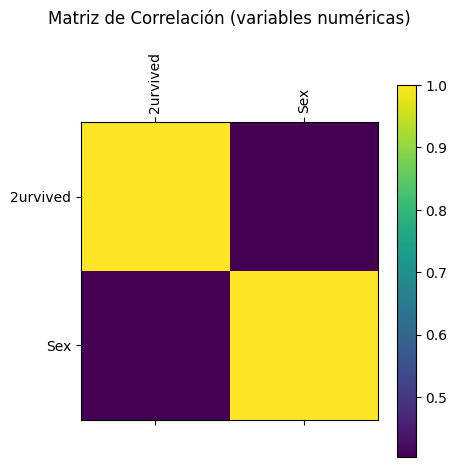

In [58]:
# Matriz de correlación solo con columnas numéricas
matriz = df_copia.corr(numeric_only=True)
# Mostrarla como imagen
plt.matshow(matriz)
plt.colorbar()
plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=90)
plt.yticks(range(len(matriz.columns)), matriz.columns)
plt.title("Matriz de Correlación (variables numéricas)", pad=20)
plt.show()

`df_copia.corr(numeric_only=True)` calcula las correlaciones entre todas las columnas numéricas de `df_copia`. `plt.matshow()` la dibuja como una imagen donde los colores indican la fuerza y dirección de la correlación.

Un `heatmap` de `seaborn` es a menudo más claro para ver los valores. 🔥🗺️


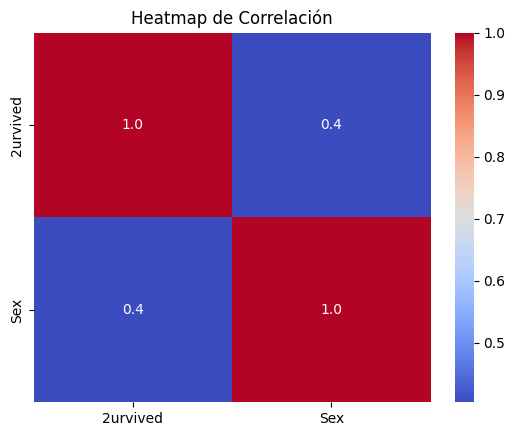

In [59]:
sns.heatmap(matriz, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Heatmap de Correlación")
plt.show()

* `annot=True` muestra los números de correlación en cada cuadrito.
* `fmt=".1f"` formatea esos números a un decimal.
* `cmap="coolwarm"` usa un mapa de colores donde, típicamente, rojo es positivo, azul es negativo y blanco/gris es cercano a cero.

Para un análisis más completo de correlaciones en todo el DataFrame original (`df`), se usa una función de la librería `funpymodeling`. 🕵️‍♀️


In [60]:
df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [68]:
#Seleccionar variables basado en la correlación
from funpymodeling.exploratory import corr_pair 

cor = corr_pair(df)
cor

,v1,v2,R,R2
1,Age,Passengerid,0.025799,0.000666
2,Fare,Passengerid,0.031128,0.000969
3,Sex,Passengerid,-0.013406,0.000180
4,sibsp,Passengerid,-0.055224,0.003050
5,zero,Passengerid,NaN,NaN
...,...,...,...,...
778,zero.15,2urvived,NaN,NaN
779,zero.16,2urvived,NaN,NaN
780,Embarked,2urvived,-0.093225,0.008691
781,zero.17,2urvived,NaN,NaN


`corr_pair(df)` de `funpymodeling` calcula las correlaciones por pares entre las variables del DataFrame `df`.

Luego, el código se enfoca en encontrar qué variables están más correlacionadas con la supervivencia (`2urvived`). ¡Esto es clave para saber qué factores influyeron más en si alguien sobrevivió o no en el Titanic! 🎯


In [69]:
#Variables que mas importancia tiene en base a la sobrevivencia
cor_surv = cor[cor['v2']=='2urvived'].sort_values('R2', ascending=False) # R2 aquí parece referirse al coeficiente de correlación o su cuadrado
cor_surv

,v1,v2,R,R2
759,Sex,2urvived,0.404020,0.163232
756,Passengerid,2urvived,-0.331493,0.109888
777,Pclass,2urvived,-0.244686,0.059871
758,Fare,2urvived,0.173786,0.030202
780,Embarked,2urvived,-0.093225,0.008691
757,Age,2urvived,-0.055862,0.003121
768,Parch,2urvived,0.054908,0.003015
760,sibsp,2urvived,-0.014375,0.000207
761,zero,2urvived,NaN,NaN
762,zero.1,2urvived,NaN,NaN


Se filtra la tabla de correlaciones `cor` para quedarse solo con las filas donde la segunda variable (`v2`) es `2urvived`. Luego se ordena por `R2` (que podría ser el coeficiente de correlación $R$ o $R^2$, el coeficiente de determinación) de mayor a menor.

Se quita la correlación de `PassengerId` consigo misma o con `2urvived` si no es relevante (ya que es solo un identificador).


In [71]:
cor_surv = cor_surv[cor_surv['v1']!='Passengerid']
cor_surv

,v1,v2,R,R2
759,Sex,2urvived,0.404020,0.163232
777,Pclass,2urvived,-0.244686,0.059871
758,Fare,2urvived,0.173786,0.030202
780,Embarked,2urvived,-0.093225,0.008691
757,Age,2urvived,-0.055862,0.003121
768,Parch,2urvived,0.054908,0.003015
760,sibsp,2urvived,-0.014375,0.000207
761,zero,2urvived,NaN,NaN
762,zero.1,2urvived,NaN,NaN
763,zero.2,2urvived,NaN,NaN


Y finalmente, se seleccionan las 3 variables más correlacionadas (las "top") y las menos correlacionadas (las "bottom", con $R^2 < 0.05$).


In [72]:
#Top 3 variables
top_var = cor_surv[0:3]['v1']
top_var

759       Sex
777    Pclass
758      Fare
Name: v1, dtype: object

In [77]:
botton_var = cor_surv[cor_surv["R2"]<0.05]['v1']
botton_var

758        Fare
780    Embarked
757         Age
768       Parch
760       sibsp
Name: v1, dtype: object

Estas listas (`top_var` y `botton_var`) dan una idea de qué características podrían ser las más predictivas para un modelo de machine learning que intente adivinar la supervivencia, y cuáles podrían ser menos útiles. Por ejemplo, si "Sex" (género) o "Pclass" (clase del tiquete) aparecen en `top_var`, significa que fueron factores importantes.

¡Y eso es todo el recorrido por tu código de transformaciones! 🎉 Cada paso es como darle a los datos un tratamiento especial para que estén listos y en su mejor forma para que los modelos de machine learning o deep learning puedan aprender de ellos y hacer predicciones asombrosas. ¡Sigue así! 🚀
